In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

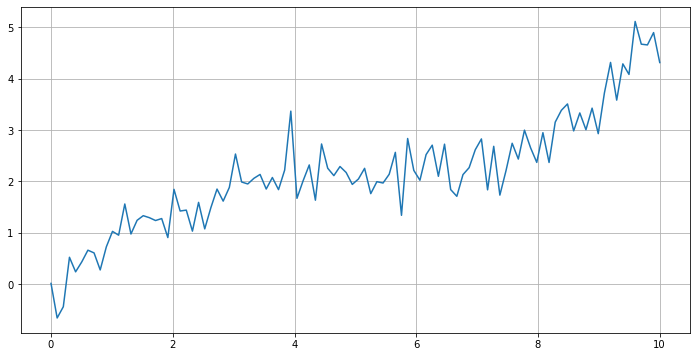

In [2]:
x = np.linspace(0,10,100)
y = x - 0.15*x**2+0.01*x**3 - 0.001*x**4+0.0001*x**5 + 0.4*np.random.randn(1,x.shape[0])[0]
x = x.reshape(-1,1)

plt.figure(figsize=(12,6))
plt.plot(x,y)
plt.grid()

In [ ]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y, test_size=0.85, random_state=42)

In [ ]:
# превращаем полином 5-й степени (выше) в полином 7-й степени
p = PolynomialFeatures(7, include_bias=False)
X_tr = p.fit_transform(x_tr)
X_ts = p.transform(x_ts)

In [ ]:
# 7 фичей каждая соответствует определенной степени? от 1 до 7?
X_tr.shape

(15, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_ts = sc.transform(X_ts)

In [ ]:
lg_r,lg_l,pred_r,pred_l = [], [], [], []
list_r=list(1.5**np.linspace(-20,20,100))
list_l=list(2**np.linspace(-20,20,100))

In [ ]:
for i in range(len(list_r)):
  m_r = Ridge(alpha=list_r[i]).fit(X_tr, y_tr)
  m_l = Lasso(alpha=list_l[i]).fit(X_tr, y_tr)
  lg_r.append(m_r)
  pred_r.append(m_r.coef_)
  lg_l.append(m_l)
  pred_l.append(m_l.coef_)

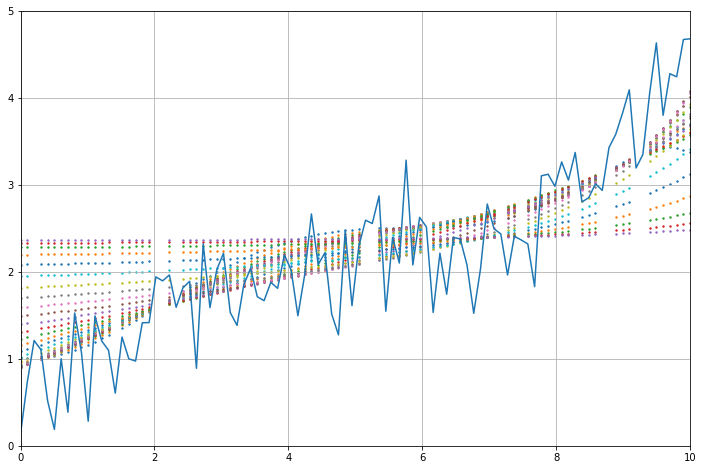

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(x,y)
for i, m in enumerate(lg_r):
  if i%4 == 0:
    plt.scatter(x_ts,m.predict(X_ts),s=2)
plt.xlim(0,10)
plt.ylim(0,5)
plt.grid()

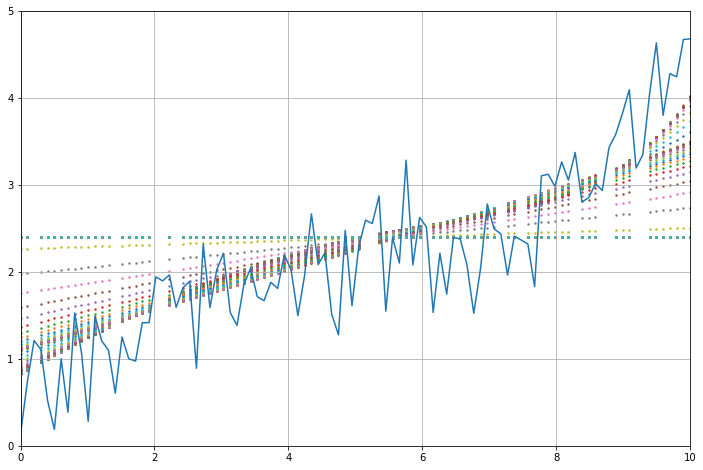

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(x,y)
for i, m in enumerate(lg_l):
    plt.scatter(x_ts,m.predict(X_ts),s=2)
plt.xlim(0,10)
plt.ylim(0,5)
plt.grid()

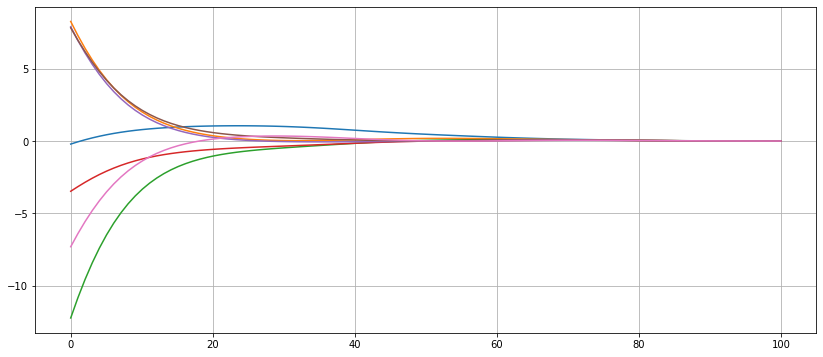

In [ ]:
# изменение коэффициентов по мере увеличения регуляризации L2
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_r),len(pred_r))
for i in np.vstack(pred_r).T:
    plt.plot(x_l,i)
plt.grid()    


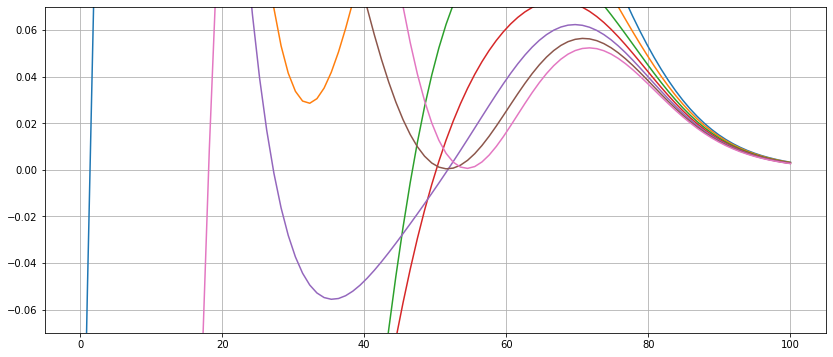

In [ ]:
# L1
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_r),len(pred_r))
for i in np.vstack(pred_r).T:
    plt.plot(x_l,i)
plt.ylim(-0.07,0.07)    
plt.grid()

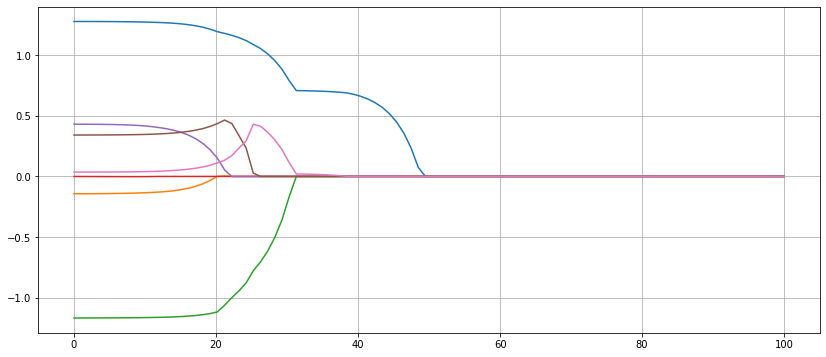

In [ ]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i))  
plt.grid()    


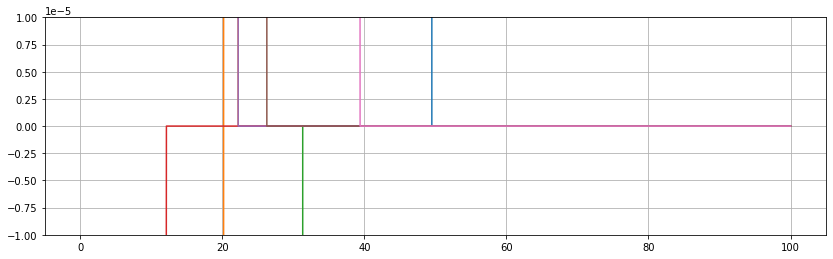

In [ ]:
plt.figure(figsize=[14,4])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i))
plt.ylim(-0.00001,0.00001)   
plt.grid() 

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
lg_r,lg_l,pred_r,pred_l = [], [], [], []
list_r=list(1.5**np.linspace(-20,20,100))
list_l=list(2**np.linspace(-20,20,100))

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
for i in range(len(list_r)):
  m_r = Ridge(alpha=list_r[i]).fit(X, y)
  m_l = Lasso(alpha=list_l[i]).fit(X, y)
  lg_r.append(m_r)
  pred_r.append(m_r.coef_)
  lg_l.append(m_l)
  pred_l.append(m_l.coef_)

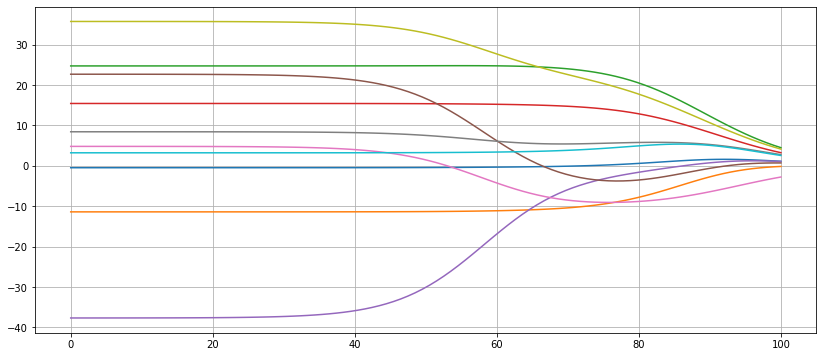

In [ ]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_r),len(pred_r))
for i in np.vstack(pred_r).T:
    plt.plot(x_l,i)
plt.grid()  

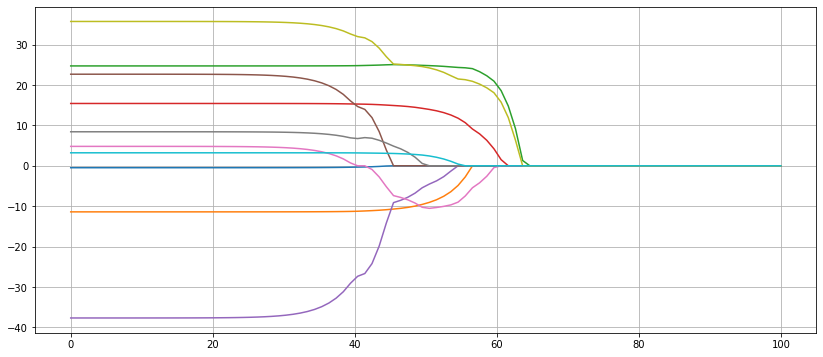

In [ ]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i))  
plt.grid() 